<a href="https://colab.research.google.com/github/Yoqued/OLC2_2SEVD25_ML_3/blob/Javier/Aprendizaje_Supervisadol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Creamos datos ficticios de kilometraje (en kilómetros)
kilometros = np.array([10_000, 20_000, 30_000, 40_000, 50_000,
                       60_000, 70_000, 80_000, 90_000, 100_000])

# Precios correspondientes (en dólares, por ejemplo)
precios = np.array([22_000, 20_000, 19_000, 17_500, 16_000,
                    15_000, 14_000, 13_000, 12_500, 12_000])

In [ ]:
df = pd.DataFrame({
    "kilometros": kilometros,
    "precio": precios
})

df

,kilometros,precio
0,10000,22000
1,20000,20000
2,30000,19000
3,40000,17500
4,50000,16000
5,60000,15000
6,70000,14000
7,80000,13000
8,90000,12500
9,100000,12000


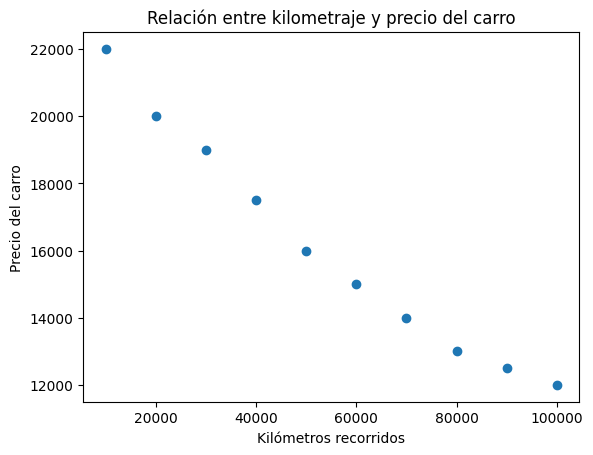

In [ ]:
plt.scatter(df["kilometros"], df["precio"])
plt.xlabel("Kilómetros recorridos")
plt.ylabel("Precio del carro")
plt.title("Relación entre kilometraje y precio del carro")
plt.show()

In [ ]:
X = df[['kilometros']]
X

,kilometros
0,10000
1,20000
2,30000
3,40000
4,50000
5,60000
6,70000
7,80000
8,90000
9,100000


In [ ]:
y = df['precio']
y

,precio
0,22000
1,20000
2,19000
3,17500
4,16000
5,15000
6,14000
7,13000
8,12500
9,12000


In [ ]:
# Entrenar el modelo de regresión lineal

# Creamos el modelo
modelo = LinearRegression()

# Entrenamos el modelo con los datos
modelo.fit(X, y)

# Obtenemos los parámetros aprendidos
intercepto = modelo.intercept_
pendiente = modelo.coef_[0]

print("Intercepto (b0):", intercepto)
print("Pendiente (b1):", pendiente)
print(f"Ecuación del modelo: precio = {intercepto:.2f} + {pendiente:.4f} * kilometros")

Intercepto (b0): 22233.333333333332
Pendiente (b1): -0.1115151515151515
Ecuación del modelo: precio = 22233.33 + -0.1115 * kilometros


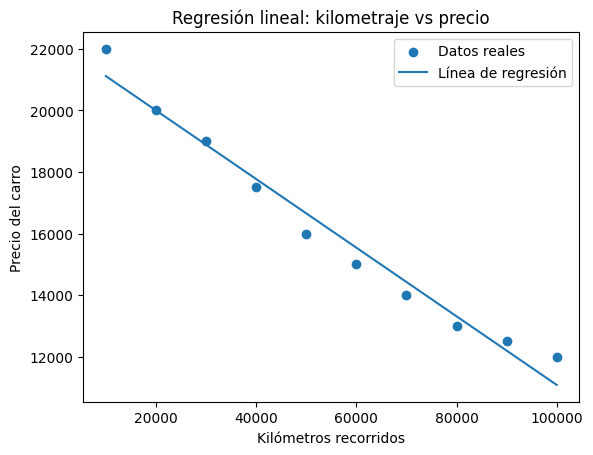

In [ ]:
# Predicciones del modelo para dibujar la recta
y_pred_linea = modelo.predict(X)

plt.scatter(df["kilometros"], df["precio"], label="Datos reales")
plt.plot(df["kilometros"], y_pred_linea, label="Línea de regresión")
plt.xlabel("Kilómetros recorridos")
plt.ylabel("Precio del carro")
plt.title("Regresión lineal: kilometraje vs precio")
plt.legend()
plt.show()

In [ ]:
y_pred_linea = modelo.predict(X)
y_pred_linea

array([21118.18181818, 20003.03030303, 18887.87878788, 17772.72727273,
       16657.57575758, 15542.42424242, 14427.27272727, 13312.12121212,
       12196.96969697, 11081.81818182])

In [ ]:
# Nuevos kilometrajes para predecir
nuevos_km = np.array([[65_000],
                      [120_000]])

predicciones = modelo.predict(nuevos_km)

for km, precio_pred in zip(nuevos_km.flatten(), predicciones):
    print(f"Para {km:,.0f} km, el precio estimado es: ${precio_pred:,.2f}")

Para 65,000 km, el precio estimado es: $14,984.85
Para 120,000 km, el precio estimado es: $8,851.52


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# CLASIFICACIÓN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Datos ficticios
datos = {
    "peso": [150, 160, 170, 120, 130, 110, 50, 60, 55],
    "dulzura": [7, 8, 7, 6, 5, 6, 9, 8, 10],
    "tipo": ["manzana", "manzana", "manzana",
             "banana", "banana", "banana",
             "uva", "uva", "uva"]
}

df = pd.DataFrame(datos)
df


,peso,dulzura,tipo
0,150,7,manzana
1,160,8,manzana
2,170,7,manzana
3,120,6,banana
4,130,5,banana
5,110,6,banana
6,50,9,uva
7,60,8,uva
8,55,10,uva


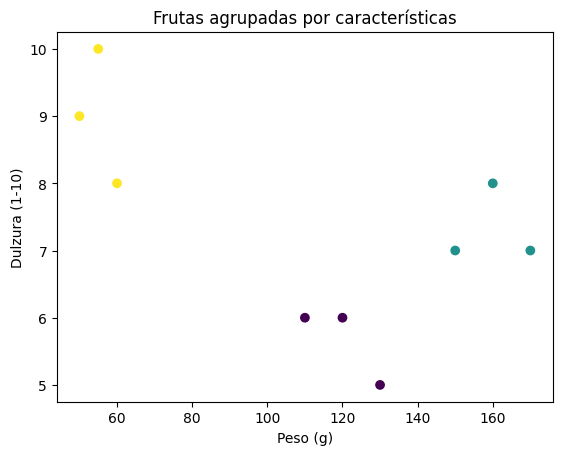

In [ ]:
plt.scatter(df["peso"], df["dulzura"], c=df["tipo"].astype('category').cat.codes)
plt.xlabel("Peso (g)")
plt.ylabel("Dulzura (1-10)")
plt.title("Frutas agrupadas por características")
plt.show()


In [ ]:
X = df[["peso", "dulzura"]]   # 2 características → matriz 2D
y = df["tipo"]                # etiqueta → 1D

In [ ]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

print("Etiquetas numéricas:", y_encoded)

Etiquetas numéricas: [1 1 1 0 0 0 2 2 2]
